In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import torch
import librosa
import torchaudio
import matplotlib.pyplot as plt
from IPython.display import Audio

In [2]:
df_taxonomy = pd.read_csv('birdclef-2025/taxonomy.csv')
df_train_base = pd.read_csv('birdclef-2025/train.csv')

In [3]:
df_all = pd.merge(df_train_base, df_taxonomy[['class_name', 'primary_label']], on='primary_label', how='inner')


In [4]:
# taxonomy_df = df[['class_name', 'primary_label']]
train_df = df_all[['primary_label','filename', 'scientific_name', 'class_name','latitude', 'longitude']]

In [5]:
aves_labels = train_df.loc[train_df['class_name']=='Aves', 'primary_label'].unique()

In [6]:
train_df.loc[:,'is_ave'] = train_df['primary_label'].isin(aves_labels)

C:\Users\overm\AppData\Local\Temp\ipykernel_12736\3360049824.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df.loc[:,'is_ave'] = train_df['primary_label'].isin(aves_labels)


In [7]:
train_df['class_name'].value_counts()

class_name
Aves        27648
Amphibia      583
Mammalia      178
Insecta       155
Name: count, dtype: int64

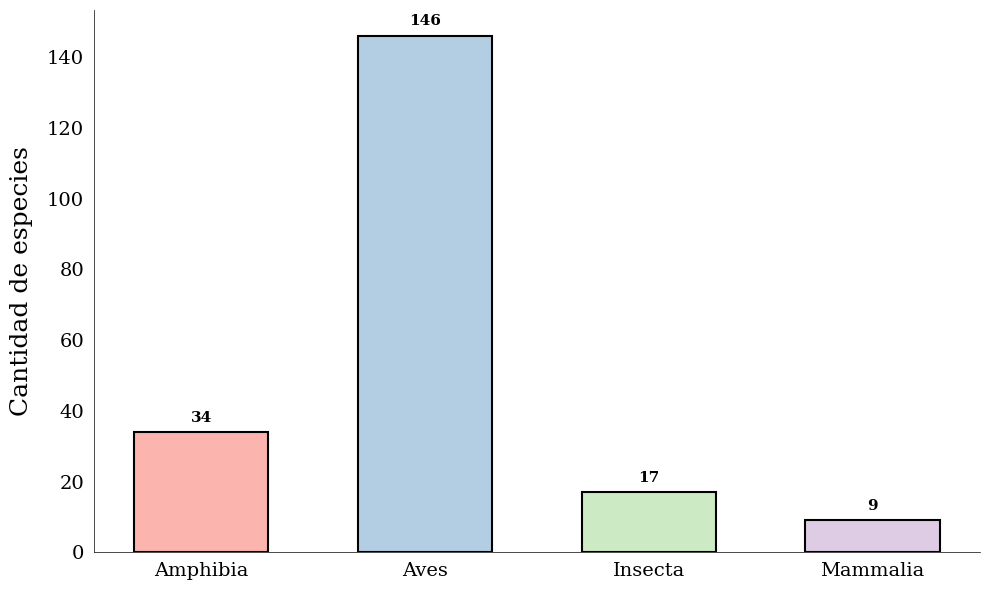

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Agrupar especies únicas por clase
grupo = train_df.groupby('class_name')['scientific_name'].nunique()
lista_especies = grupo.to_frame().T
lista_especies = pd.DataFrame(lista_especies)

# Configuración de estilo limpio
plt.style.use('default')
sns.set_style("white")
plt.rcParams['font.family'] = 'serif'

# Crear figura
fig, ax = plt.subplots(figsize=(10, 6), facecolor='#ffffff')
ax.set_facecolor('#ffffff')

# Colores pastel y hatch
colores = sns.color_palette("Pastel1", len(lista_especies.columns))
# hatches = ['+', 'x', 'O', '*']

# Dibujar las barras
for i, clase in enumerate(lista_especies.columns):
    valor = lista_especies.iloc[0][clase]
    ax.bar(clase, valor,
           color=colores[i],
           edgecolor='black',
           linewidth=1.5,
           alpha=1,
           width=0.6,
       #     hatch=hatches[i % len(hatches)],
           label=clase)

    # Etiqueta encima de la barra
    ax.text(i, valor + max(lista_especies.iloc[0]) * 0.02,
            str(valor), ha='center', fontsize=11,
            fontweight='bold', color='black')

# Títulos y etiquetas
# ax.set_title('Número de especies por clase',
            #  fontsize=16, pad=20, color='black', fontweight='bold')
ax.set_ylabel('Cantidad de especies', fontsize=18, labelpad=10, color='black')
ax.set_xlabel('', fontsize=18, labelpad=10, color='black')

# Ticks
ax.tick_params(axis='both', which='major', labelsize=14, colors='black')

# # Etiquetas negritas
# for label in ax.get_xticklabels():
#     label.set_fontweight('bold')
# for label in ax.get_yticklabels():
#     label.set_fontweight('bold')

# Ejes visibles
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_color('black')
ax.spines['bottom'].set_color('black')
ax.spines['left'].set_linewidth(0.5)
ax.spines['bottom'].set_linewidth(0.5)

# # Leyenda estilizada
# legend = ax.legend(title="Clase", bbox_to_anchor=(0.6, 1),
#                    loc='upper left', frameon=True, fontsize=15,
#                    title_fontsize=15, edgecolor='#dddddd',
#                    facecolor='white', framealpha=1)
# legend.get_frame().set_boxstyle('round,pad=0.5')

plt.tight_layout()
plt.show()


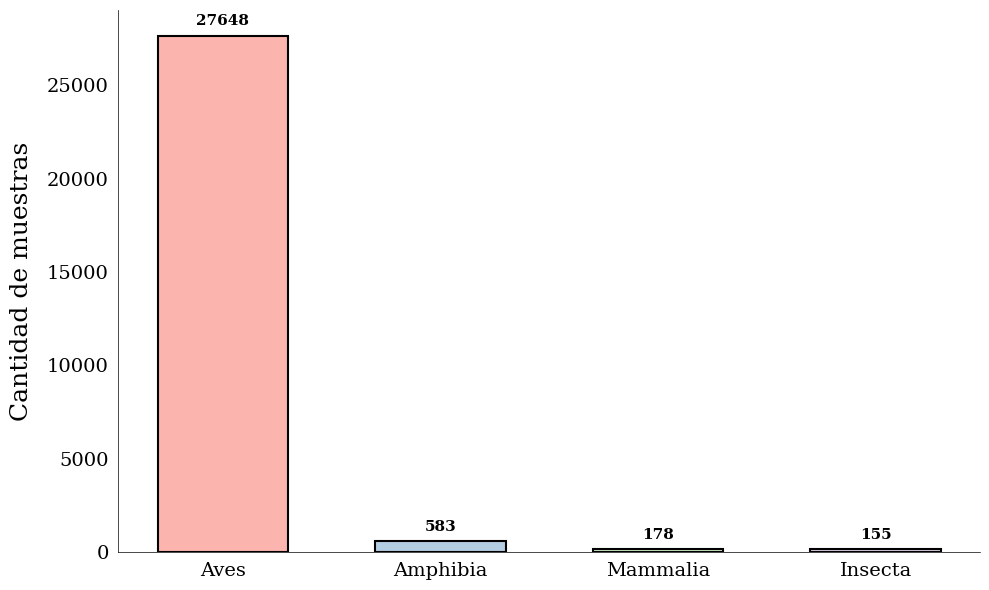

In [9]:

# Nuemro de muestas por clase
conteo_muestras = train_df['class_name'].value_counts()

# Estilo visual consistente
plt.style.use('default')
sns.set_style("white")
plt.rcParams['font.family'] = 'serif'

# Figura
fig, ax = plt.subplots(figsize=(10, 6), facecolor='#ffffff')
ax.set_facecolor('#ffffff')

# Paleta de colores pastel
colores = sns.color_palette("Pastel1", len(conteo_muestras))

# Dibujar barras
for i, (clase, valor) in enumerate(conteo_muestras.items()):
    ax.bar(clase,
           valor,
           color=colores[i],
           edgecolor='black',
           linewidth=1.5,
           alpha=1,
           width=0.6)

    # Texto encima de las barras
    ax.text(i, valor + max(conteo_muestras) * 0.02,
            str(valor), ha='center', fontsize=11,
            fontweight='bold', color='black')

# Títulos y etiquetas
# ax.set_title('Número de muestras por clase',
#              fontsize=16, pad=20, color='black', fontweight='bold')
ax.set_ylabel('Cantidad de muestras', fontsize=18, labelpad=10, color='black')
ax.set_xlabel('', fontsize=18, labelpad=10, color='black')

# Ticks
ax.tick_params(axis='both', which='major', labelsize=14, colors='black')

# Ejes
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_color('black')
ax.spines['bottom'].set_color('black')
ax.spines['left'].set_linewidth(0.5)
ax.spines['bottom'].set_linewidth(0.5)

# Ajuste y mostrar
plt.tight_layout()
plt.show()


In [12]:
conteo = train_df.groupby(['class_name', 'scientific_name']).size()

mayor_especie = conteo.groupby(level=0).idxmax()
mayor_cantidad = conteo.groupby(level=0).max()

resultado = pd.DataFrame({
    'Especie': [species for _, species in mayor_especie],
    'Muestras': mayor_cantidad.values
}, index=mayor_especie.index)  
resultado

Especie  Muestras
class_name                                  
Amphibia    Engystomops pustulosus        82
Aves          Pitangus sulphuratus       990
Insecta                  Gryllidae        33
Mammalia             Procyon lotor       108

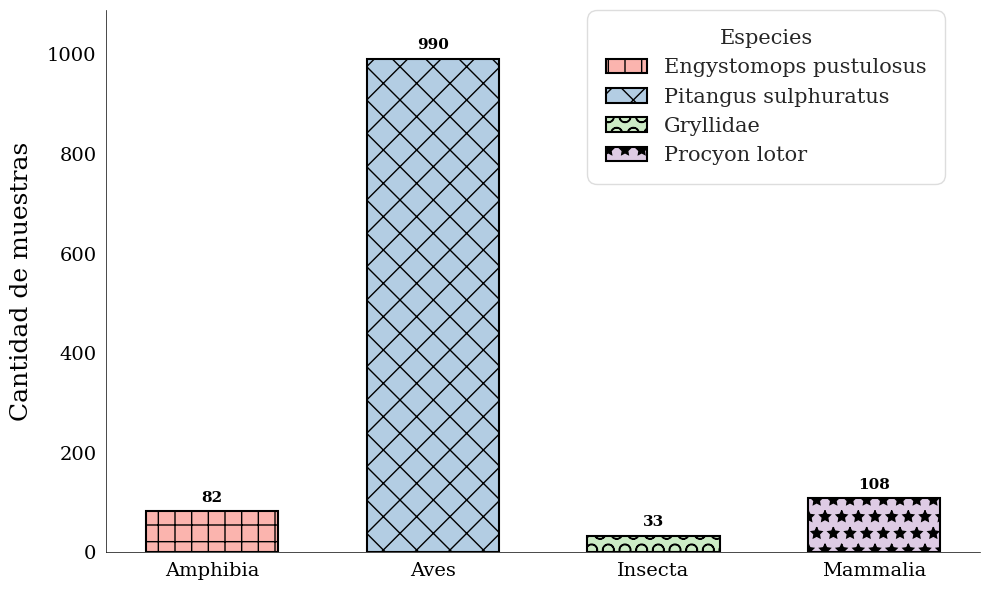

In [14]:
# Especie con mayor numero de muestras por clase

# Configuración de estilo limpio y elegante
plt.style.use('default')
sns.set_style("white")
plt.rcParams['font.family'] = 'serif'

# Crear la figura con tamaño adecuado
fig, ax = plt.subplots(figsize=(10, 6), facecolor='#ffffff')
ax.set_facecolor('#ffffff')

# Paleta de colores pastel
# colores = sns.color_palette("Set2", len(resultado))
colores = sns.color_palette("Pastel1", len(resultado))

# Lista de patrones de hatch (grabados visuales)
hatches = ['+', 'x', 'O', '*']

# Graficar barras con color + hatch
for i, (clase, row) in enumerate(resultado.iterrows()):
    bar = ax.bar(clase, row['Muestras'], 
                 color=colores[i], 
                 label=f"{row['Especie']}", 
                 edgecolor='black',
                 linewidth=1.5,
                 alpha=1, 
                 width=0.6,
                 hatch=hatches[i % len(hatches)])  # Hatch cíclico

# Añadir valores sobre las barras
for i, (clase, row) in enumerate(resultado.iterrows()):
    ax.text(i, row['Muestras'] + max(resultado['Muestras'])*0.02, 
            str(row['Muestras']), 
            ha='center', fontsize=11, fontweight='bold',
            color='black')

# # Mejorar títulos y etiquetas
# ax.set_title('Especie con mayor número de muestras por clase', 
#            fontsize=16, pad=20, color='#000000', fontweight='bold')
ax.set_xlabel('', fontsize=18, labelpad=18, color='#000000')
ax.set_ylabel('Cantidad de muestras', fontsize=18, labelpad=10, color='#000000')
## Ejes negros
# Aumentar tamaño y color de los números en los ejes
ax.tick_params(axis='both', which='major', labelsize=14, colors='black')  # Ambos ejes


# Ajustar el eje Y para dar espacio a los números
ax.set_ylim(0, max(resultado['Muestras'])*1.1)

# Eliminar líneas de los ejes
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_linewidth(0.5)
ax.spines['bottom'].set_linewidth(0.5)
ax.spines['left'].set_color('#000000')
ax.spines['bottom'].set_color('#000000')

# Mejorar leyenda
legend = ax.legend(title="Especies", bbox_to_anchor=(0.55, 1), 
               loc='upper left', frameon=True, fontsize=15,
               title_fontsize=15, edgecolor='#dddddd',
               facecolor='white', framealpha=1)
legend.get_frame().set_boxstyle('round,pad=0.5')

# Ajustar márgenes y mostrar
plt.tight_layout()
plt.show()


In [15]:
conteo = train_df.groupby(['class_name', 'scientific_name']).size()

mayor_especie = conteo.groupby(level=0).idxmin()
mayor_cantidad = conteo.groupby(level=0).min()

resultado = pd.DataFrame({
    'Especie': [species for _, species in mayor_especie],
    'Muestras': mayor_cantidad.values
}, index=mayor_especie.index)  
resultado

Especie  Muestras
class_name                               
Amphibia    Allobates niputidea         2
Aves           Tangara inornata         6
Insecta      Orophus conspersus         2
Mammalia    Bradypus variegatus         2

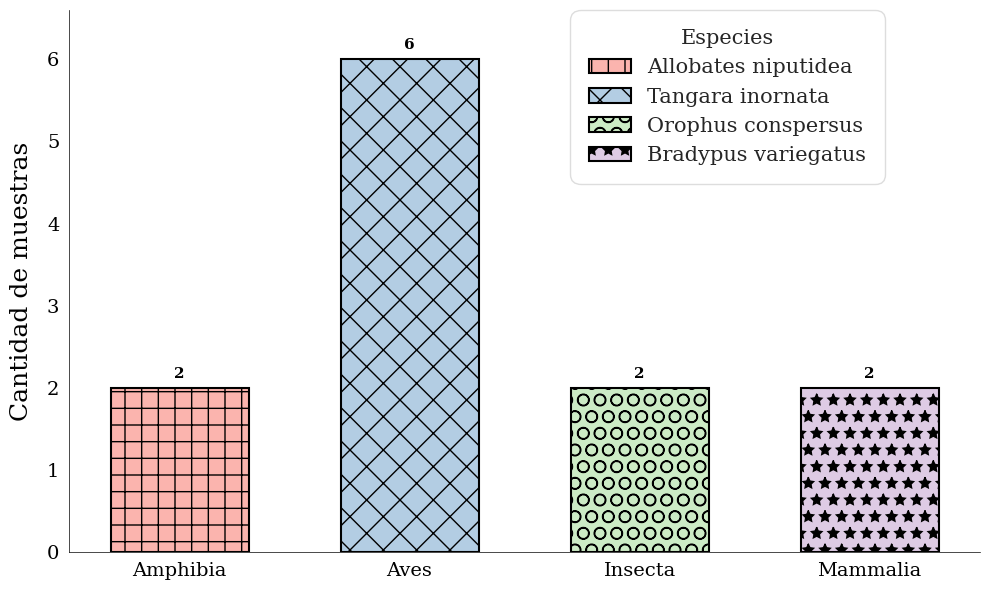

In [17]:
# Especie con menor numero de muestras por clase

# Configuración de estilo limpio y elegante
plt.style.use('default')
sns.set_style("white")
plt.rcParams['font.family'] = 'serif'

# Crear la figura con tamaño adecuado
fig, ax = plt.subplots(figsize=(10, 6), facecolor='#ffffff')
ax.set_facecolor('#ffffff')

# Paleta de colores pastel
# colores = sns.color_palette("Set2", len(resultado))
colores = sns.color_palette("Pastel1", len(resultado))

# Lista de patrones de hatch (grabados visuales)
hatches = ['+', 'x', 'O', '*']

# Graficar barras con color + hatch
for i, (clase, row) in enumerate(resultado.iterrows()):
    bar = ax.bar(clase, row['Muestras'], 
                 color=colores[i], 
                 label=f"{row['Especie']}", 
                 edgecolor='black',
                 linewidth=1.5,
                 alpha=1, 
                 width=0.6,
                 hatch=hatches[i % len(hatches)])  # Hatch cíclico

# Añadir valores sobre las barras
for i, (clase, row) in enumerate(resultado.iterrows()):
    ax.text(i, row['Muestras'] + max(resultado['Muestras'])*0.02, 
            str(row['Muestras']), 
            ha='center', fontsize=11, fontweight='bold',
            color='black')

# Mejorar títulos y etiquetas
# ax.set_title('Especie con menor número de muestras por clase', 
#            fontsize=16, pad=20, color='#000000', fontweight='bold')
ax.set_xlabel('', fontsize=18, labelpad=18, color='#000000')
ax.set_ylabel('Cantidad de muestras', fontsize=18, labelpad=10, color='#000000')
## Ejes negros
# Aumentar tamaño y color de los números en los ejes
ax.tick_params(axis='both', which='major', labelsize=14, colors='black')  # Ambos ejes


# Ajustar el eje Y para dar espacio a los números
ax.set_ylim(0, max(resultado['Muestras'])*1.1)

# Eliminar líneas de los ejes
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_linewidth(0.5)
ax.spines['bottom'].set_linewidth(0.5)
ax.spines['left'].set_color('#000000')
ax.spines['bottom'].set_color('#000000')

# Mejorar leyenda
legend = ax.legend(title="Especies", bbox_to_anchor=(0.55, 1), 
               loc='upper left', frameon=True, fontsize=15,
               title_fontsize=15, edgecolor='#dddddd',
               facecolor='white', framealpha=1)
legend.get_frame().set_boxstyle('round,pad=0.5')

# Ajustar márgenes y mostrar
plt.tight_layout()
plt.show()


In [18]:
df_pruebas = train_df[['class_name','latitude', 'longitude']]
df_pruebas.isna().value_counts()

class_name  latitude  longitude
False       False     False        27755
            True      True           809
Name: count, dtype: int64

C:\Users\overm\AppData\Local\Temp\ipykernel_11356\859905141.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  conteo_na = df_pruebas.groupby('class_name').apply(


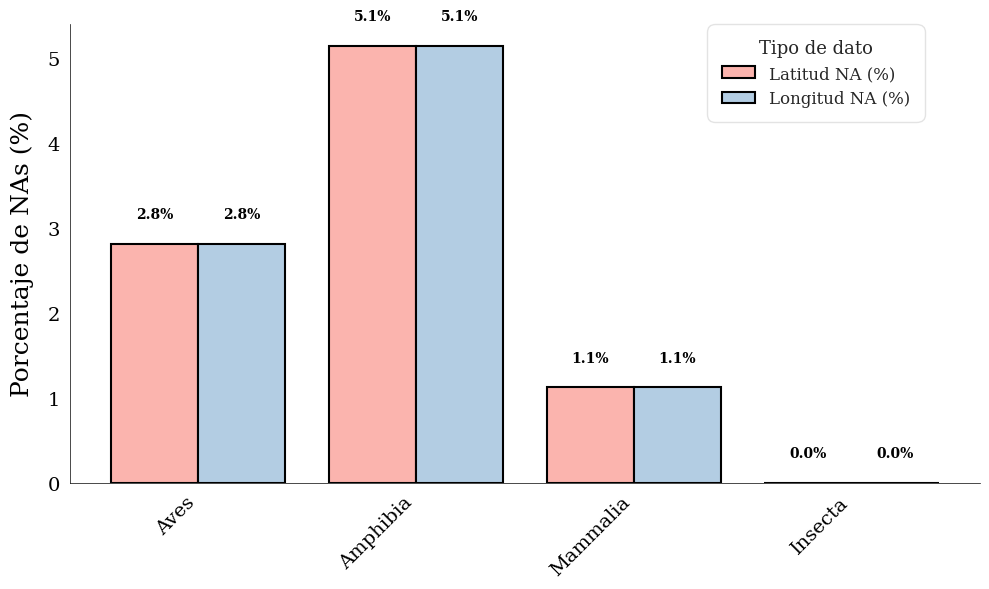

In [20]:
# Agrupar y calcular estadísticas de NA
conteo_na = df_pruebas.groupby('class_name').apply(
    lambda x: pd.Series({
        'na_latitude': x['latitude'].isna().sum(),
        'na_longitude': x['longitude'].isna().sum(),
        'total_registros': len(x),
        'porcentaje_na_lat': (x['latitude'].isna().sum() / len(x)) * 100,
        'porcentaje_na_lon': (x['longitude'].isna().sum() / len(x)) * 100
    })
)

# Ordenar por valores faltantes en latitud
resultado = conteo_na.sort_values('na_latitude', ascending=False)

# Estilo visual coherente
plt.style.use('default')
sns.set_style("white")
plt.rcParams['font.family'] = 'serif'

# Crear figura
fig, ax = plt.subplots(figsize=(10, 6), facecolor='#ffffff')
ax.set_facecolor('#ffffff')

# Paleta pastel
colores = sns.color_palette("Pastel1", 2)

# Dibujar barras
bar_width = 0.4
x = range(len(resultado))

ax.bar([i - bar_width/2 for i in x], resultado['porcentaje_na_lat'],
       width=bar_width, color=colores[0], edgecolor='black',
       linewidth=1.5, label='Latitud NA (%)', alpha=1)

ax.bar([i + bar_width/2 for i in x], resultado['porcentaje_na_lon'],
       width=bar_width, color=colores[1], edgecolor='black',
       linewidth=1.5, label='Longitud NA (%)', alpha=1)

# Añadir texto sobre las barras
for i in x:
    ax.text(i - bar_width/2, resultado.iloc[i]['porcentaje_na_lat'] + 0.3,
            f"{resultado.iloc[i]['porcentaje_na_lat']:.1f}%", ha='center',
            fontsize=10, fontweight='bold', color='black')
    ax.text(i + bar_width/2, resultado.iloc[i]['porcentaje_na_lon'] + 0.3,
            f"{resultado.iloc[i]['porcentaje_na_lon']:.1f}%", ha='center',
            fontsize=10, fontweight='bold', color='black')

# # Títulos y etiquetas
# ax.set_title('Porcentaje de valores NA por clase',
#              fontsize=16, pad=30, color='black', fontweight='bold')
ax.set_ylabel('Porcentaje de NAs (%)', fontsize=18, labelpad=10, color='black')
ax.set_xlabel('', fontsize=18, labelpad=10, color='black')

# Etiquetas del eje x
ax.set_xticks(x)
ax.set_xticklabels(resultado.index, rotation=45, ha='right', fontsize=12, color='black')

# Ejes visibles y estilizados
ax.tick_params(axis='both', which='major', labelsize=14, colors='black')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_color('black')
ax.spines['bottom'].set_color('black')
ax.spines['left'].set_linewidth(0.5)
ax.spines['bottom'].set_linewidth(0.5)

# Leyenda estilizada
legend = ax.legend(title='Tipo de dato', bbox_to_anchor=(0.7, 1), fontsize=12, title_fontsize=13,
                   frameon=True, facecolor='white', edgecolor='#dddddd')
legend.get_frame().set_boxstyle('round,pad=0.5')

# Ajustar espacio final
plt.tight_layout()
plt.show()


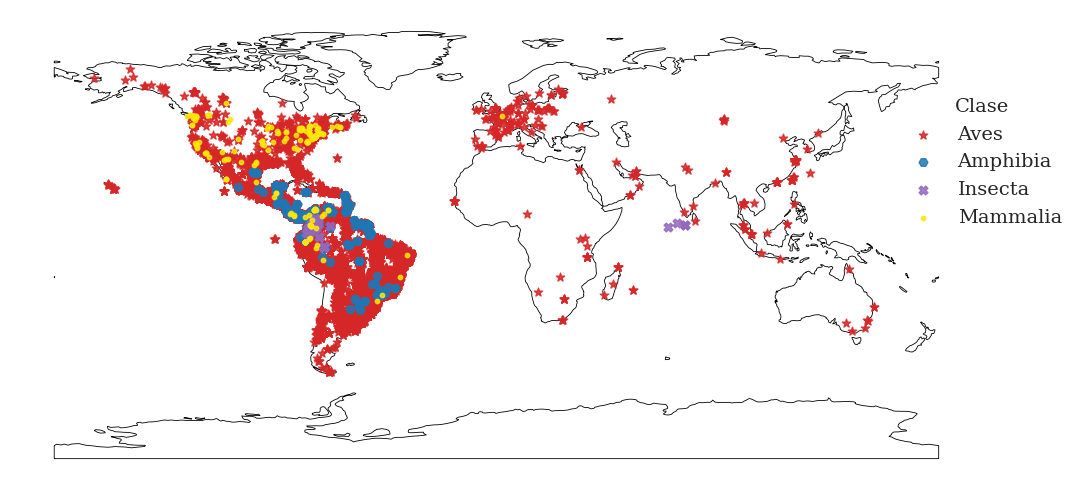

In [22]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import geodatasets
import numpy as np


np.random.seed(3)

# ─── Cargar mapa base ────────────────────────────────────────
world = gpd.read_file(geodatasets.get_path('naturalearth.land'))

# ─── Preparar tus datos ──────────────────────────────────────
df_mapa = train_df[['class_name', 'latitude', 'longitude']].dropna()
gdf_puntos = gpd.GeoDataFrame(
    df_mapa,
    geometry=gpd.points_from_xy(df_mapa.longitude, df_mapa.latitude),
    crs="EPSG:4326"
)

# ─── Crear figura ────────────────────────────────────────────
fig, ax = plt.subplots(figsize=(15, 5))

# Dibujar contornos del mapa
world.boundary.plot(ax=ax, color='black', linewidth=0.6)

# ─── Definir colores y marcadores por clase ──────────────────
colores_por_clase = {
    'Amphibia': '#1f77b4',
    'Aves': '#d62728',
    'Mammalia': "#ffe609",
    'Insecta': '#9467bd'
}
marcadores_por_clase = {
    'Aves': '*',
    'Insecta': 'X',
    'Mammalia': '.',
    'Amphibia': 'H'
}

# ─── Orden aleatorio de clases ───────────────────────────────
classes = np.random.permutation(gdf_puntos['class_name'].unique())

# ─── Dibujar puntos ──────────────────────────────────────────
for zorder_idx, class_name in enumerate(classes):
    subset = gdf_puntos[gdf_puntos['class_name'] == class_name]
    coords = subset.geometry

    ax.scatter(
        coords.x,
        coords.y,
        c=colores_por_clase.get(class_name, 'gray'),
        marker=marcadores_por_clase.get(class_name, 'o'),
        s=40,
        alpha=0.85,
        label=class_name,
        zorder=2 + zorder_idx  # Cada clase queda un poco encima de la anterior
    )

# ─── Estética ────────────────────────────────────────────────
ax.set_facecolor('white')
ax.set_axis_off()
# plt.title('Ubicación geográfica por clase', fontsize=14, weight='bold')
plt.legend(title='Clase', loc='upper left', bbox_to_anchor=(0.9, 0.85), frameon=False, title_fontsize=14, fontsize=14)
plt.tight_layout()
plt.savefig('mapa_mundi_orden_aleatorio.png', dpi=1200, bbox_inches='tight')
plt.show()


In [8]:
filename=train_df[train_df['class_name'] == 'Insecta']['filename']

Text(0.5, 14.722222222222216, 'Time (s)')

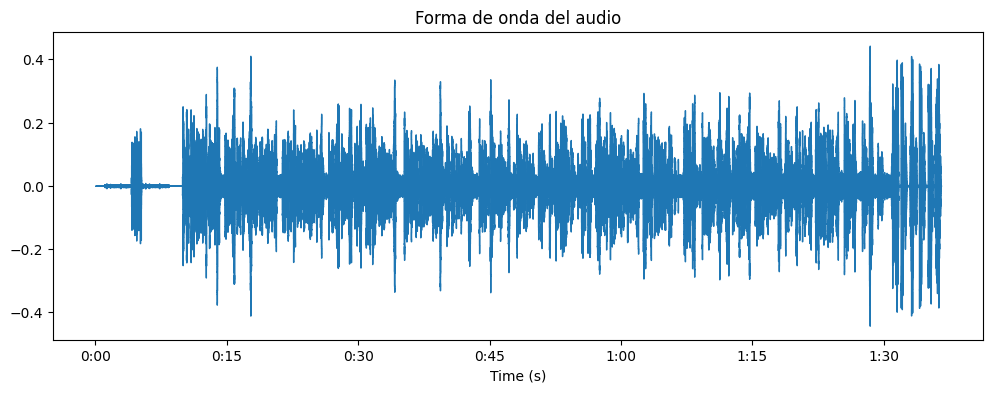

In [9]:
import librosa
import librosa.display
import matplotlib.pyplot as plt

# Carga el audio (reemplaza la ruta por tu archivo)
id = f'birdclef-2025/train_audio/{filename.iloc[1]}'
y, sr = librosa.load(id, sr=32000)

# Graficar la forma de onda
plt.figure(figsize=(12, 4))
librosa.display.waveshow(y, sr=sr)
plt.title('Forma de onda del audio')
plt.xlabel('Time (s)')

In [10]:

model, utils = torch.hub.load(repo_or_dir='snakers4/silero-vad', model='silero_vad') # type: ignore
(get_speech_timestamps, _, read_audio, _, _) = utils

sr=32000
id = f'birdclef-2025/train_audio/{filename.iloc[1]}'
wav, sr = torchaudio.load(id, sr)
wav = wav.mean(dim=0)  # convertir a mono si es estéreo
speech_timestamps = get_speech_timestamps(wav, model, sampling_rate=sr)

non_speech_segments = []
prev_end = 0

total_samples = len(wav)
for ts in speech_timestamps:
    start = ts['start']
    end = ts['end']
    
    if prev_end < start:
        non_speech_segments.append((prev_end, start))
    
    prev_end = end

# Si sobra algo al final
if prev_end < total_samples:
    non_speech_segments.append((prev_end, total_samples))

# recortar cada segmento:
clean_audio = (torch.concat([wav[start:end] for start, end in non_speech_segments])).numpy()


Using cache found in C:\Users\overm/.cache\torch\hub\snakers4_silero-vad_master
C:\Users\overm/.cache\torch\hub\snakers4_silero-vad_master\src\silero_vad\utils_vad.py:277: UserWarning: Sampling rate is a multiply of 16000, casting to 16000 manually!
  warnings.warn('Sampling rate is a multiply of 16000, casting to 16000 manually!')


In [11]:
display(Audio(id))

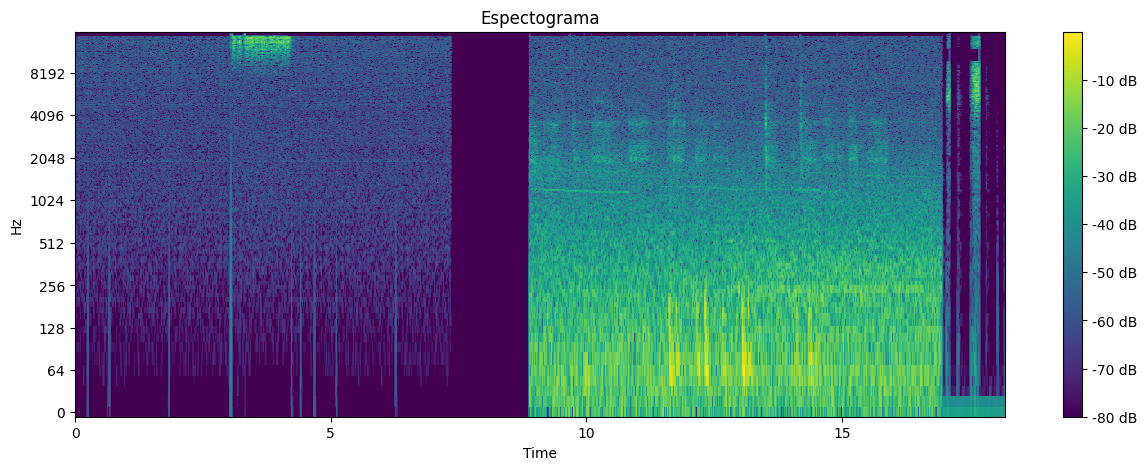

In [12]:
display(Audio(data=clean_audio, rate=sr))
dta = np.abs(librosa.stft(clean_audio))
D = librosa.amplitude_to_db(dta, ref=np.max)
plt.figure(figsize=(15, 5))
librosa.display.specshow(D, sr=sr, x_axis='time', y_axis='log', cmap='viridis')
plt.colorbar(format='%+2.0f dB')
plt.title('Espectograma')
# plt.ylim(800, 4000)
# plt.xlim(0, 5)
plt.show()

In [138]:
# # Crear la funcion para quitar las vooces humnas 
# import torch
# import librosa
# import torchaudio

# model, utils = torch.hub.load(repo_or_dir='snakers4/silero-vad', model='silero_vad')
# (get_speech_timestamps, _, read_audio, _, _) = utils

# def _filter_voice(file_path, sr=32000):

#     filename = file_path  
#     wav, sr = torchaudio.load(filename, sr)
#     wav = wav.mean(dim=0)  # convertir a mono si es estéreo

#     speech_timestamps = get_speech_timestamps(wav, model, sampling_rate=sr)

#     non_speech_segments = []
#     prev_end = 0

#     total_samples = len(wav)
#     for ts in speech_timestamps:
#         start = ts['start']
#         end = ts['end']
        
#         if prev_end < start:
#             non_speech_segments.append((prev_end, start))
        
#         prev_end = end

#     if prev_end < total_samples:
#         non_speech_segments.append((prev_end, total_samples))

#     clean_audio = (torch.concat([wav[start:end] for start, end in non_speech_segments])).numpy()

#     return clean_audio



# def _extract_features(audio):
#     dta = np.abs(librosa.stft(audio))
#     D = librosa.amplitude_to_db(dta, ref=np.max)

#     return D

# # def chunks(audio, sr, time):
# n_samples = sr * 5

# id = f'birdclef-2025/train_audio/{filename.iloc[1]}'

# wav = _filter_voice(id)
# print("dim wav", wav.shape)
# cont = 0
# chuks = []
# for i in range(0, len(wav), n_samples):
#     start = i
#     end = i + n_samples

#     if end <= len(clean_audio):
#         chunk = clean_audio[start:end]
#     else:   
#         # padding circular
#         faltan = end - len(clean_audio)
#         padding = clean_audio[:faltan]
#         chunk = np.concatenate([clean_audio[start:], padding])

#     chuks.append(chunk)
    
#     print(chunk.shape)
#     print(n_samples)
#     # print(wav[start:end])
#     x = np.abs(librosa.stft(chunk))
#     D = librosa.amplitude_to_db(x, ref=np.max)
#     # S = librosa.power_to_db(x, ref=np.max)
#     plt.figure(figsize=(15, 5))
#     librosa.display.specshow(D, sr=sr, x_axis='time', y_axis='log', cmap='viridis')
#     # librosa.display.specshow(S, sr=sr, x_axis='time', y_axis='log', cmap='viridis')


#     plt.colorbar(format='%+2.0f dB')
#     plt.title('Espectograma')
#     # plt.ylim(800, 4000)
#     # plt.xlim(0, 5)
#     plt.show()
#     display(Audio(data=chunk, rate=sr))

#     # print(i)
#     cont +=1

#     if cont==3:
#         break


In [13]:
model, utils = torch.hub.load(repo_or_dir='snakers4/silero-vad', model='silero_vad') # type: ignore

(get_speech_timestamps, _, read_audio, *_) = utils

def _filter_voice(file_path, sr=32000):
    
  filename = file_path  
  wav, sr = torchaudio.load(filename, sr)
  wav = wav.mean(dim=0)  # convertir a mono si es estéreo
  
  
  def fun_clean(wav, sr):

    speech_timestamps = get_speech_timestamps(wav, model, sampling_rate=sr)
    # print(len(speech_timestamps))
    if len(speech_timestamps) != 0:

      if speech_timestamps[0]['start']==0:
        clean_audio = (wav[speech_timestamps[0]['end']:])
      
      else:
        clean_audio = (wav[0:speech_timestamps[0]['start']])
        
    else:
      clean_audio = wav

    return clean_audio

  clean_audio = fun_clean(wav=wav, sr=sr)
  clean_audio = fun_clean(wav=clean_audio, sr=sr)

  return clean_audio.numpy()

def ext_chunks(audio_clean, sr, time):
  n_samples = sr * time
  chunks = []
  for i in range(0, len(audio_clean), n_samples):
    start = i
    end = i + n_samples

    if end <= len(audio_clean):
      chunk = audio_clean[start:end]
    else:   
      # padding circular
      faltan = end - len(audio_clean)
      padding = audio_clean[:faltan]
      chunk = np.concatenate([audio_clean[start:], padding])

    chunks.append(chunk)
  return np.array(chunks)

def _extract_features(audio):
    dta = np.abs(librosa.stft(audio, n_fft=2048))
    D = librosa.amplitude_to_db(dta, ref=np.max)

    return D


Using cache found in C:\Users\overm/.cache\torch\hub\snakers4_silero-vad_master


In [19]:
filename=train_df[train_df['class_name'] == 'Insecta']['filename']

In [56]:
id = f'birdclef-2025/train_audio/{filename.iloc[1]}'
# id = 'audio_1.mp3'
clean_audio = _filter_voice(id, sr=32000)

D = _extract_features(clean_audio)
# print(D.shape)
# librosa.display.specshow(D, sr=sr, x_axis='time', y_axis='log', cmap='viridis')
# plt.colorbar(format='%+2.0f dB')
# plt.title('Espectograma')
# # plt.ylim(800, 4000)
# # plt.xlim(0, 5)
# plt.show()

chuks = ext_chunks(audio_clean=clean_audio, sr=32000, time=5)
# display(Audio(data=clean_audio, rate=32000))
chuks.shape

C:\Users\overm/.cache\torch\hub\snakers4_silero-vad_master\src\silero_vad\utils_vad.py:277: UserWarning: Sampling rate is a multiply of 16000, casting to 16000 manually!
  warnings.warn('Sampling rate is a multiply of 16000, casting to 16000 manually!')


(2, 160000)

In [42]:
import scipy.signal

def highpass_filter(y, sr=32000, cutoff=800, order=6):
    nyquist = 0.5 * sr                     
    normal_cutoff = cutoff / nyquist       
    b, a = scipy.signal.butter(order, normal_cutoff, btype='high', analog=False) # type: ignore
    y_filtered = scipy.signal.lfilter(b, a, y)
    return y_filtered

h = highpass_filter(clean_audio)
D_2 = _extract_features(h)

In [44]:
wav, sr = torchaudio.load(id, sr)
wav = wav.mean(dim=0)  # convertir a mono si es estéreo
dta = np.abs(librosa.stft(wav.numpy()))
O = librosa.amplitude_to_db(dta, ref=np.max)

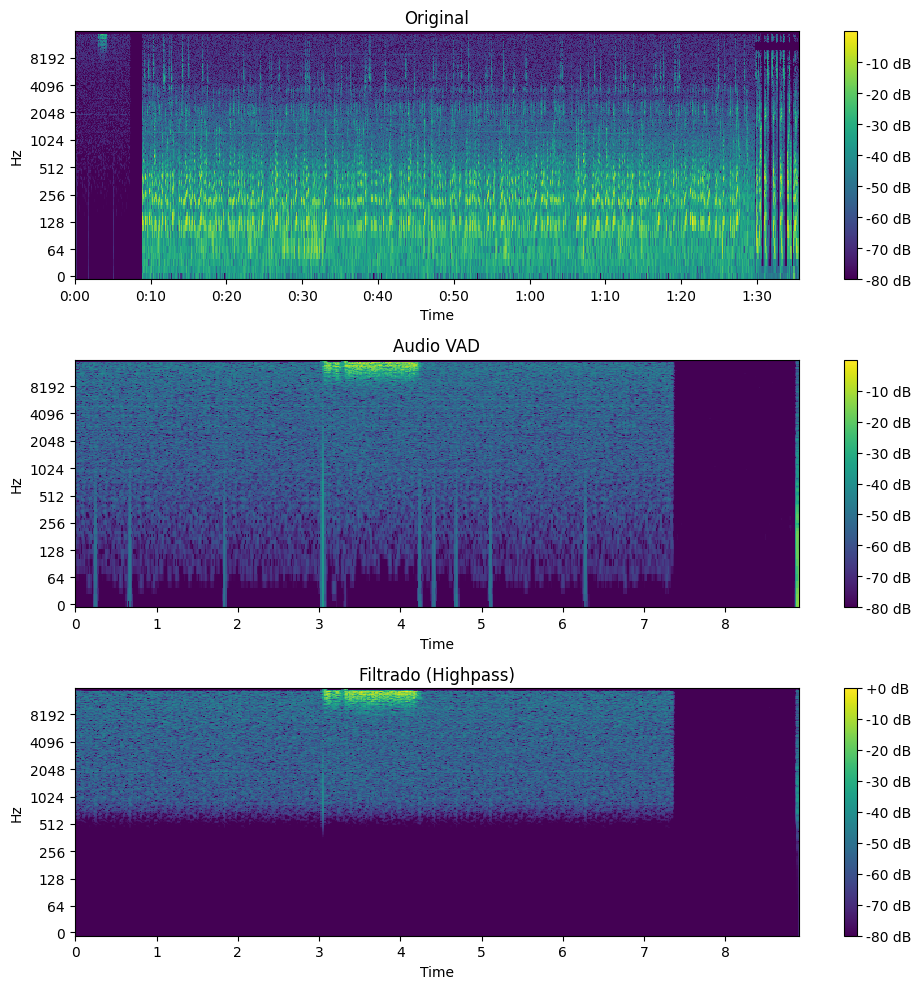

Audio Oiginal: 


Audio VAD


Audio Pasa Altas: 


In [52]:
plt.figure(figsize=(10, 10))

plt.subplot(3, 1, 1)
librosa.display.specshow(O, sr=sr, x_axis='time', y_axis='log', cmap='viridis')
plt.colorbar(format='%+2.0f dB')
plt.title("Original")


plt.subplot(3, 1, 2)
librosa.display.specshow(D, sr=sr, x_axis='time', y_axis='log', cmap='viridis')
plt.colorbar(format='%+2.0f dB')
plt.title("Audio VAD")

plt.subplot(3, 1, 3)
librosa.display.specshow(D_2, sr=sr, x_axis='time', y_axis='log', cmap='viridis')
plt.title("Filtrado (Highpass)")
plt.colorbar(format='%+2.0f dB')

plt.tight_layout()
plt.show()

print("Audio Oiginal: ")
display(Audio(filename=id))
print('Audio VAD')
display(Audio(data=clean_audio, rate=32000))
print("Audio Pasa Altas: ")
display(Audio(data=h, rate=32000))


In [18]:
D = _extract_features(h)
D.__abs__().max()

80.0

In [57]:
len(chuks)

2

2
(1025, 313)
rms_m_max:  0.18173775


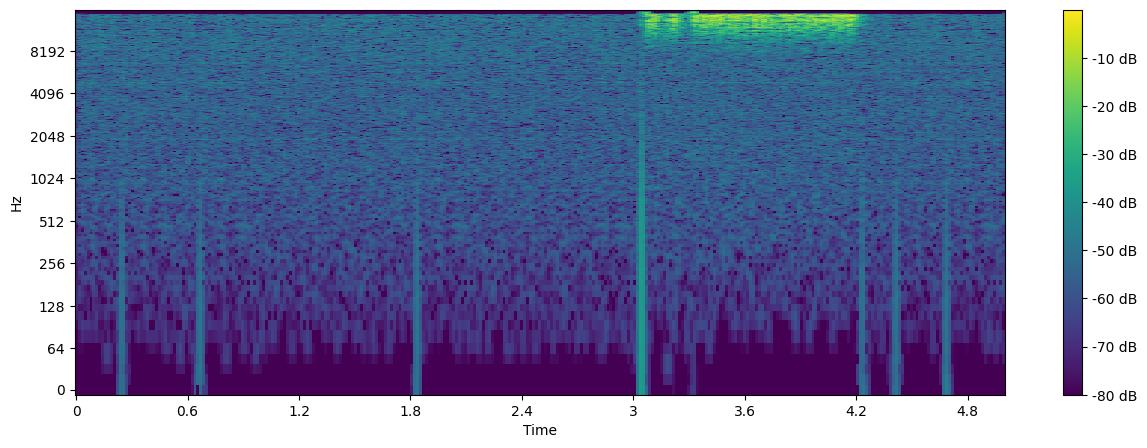

(1025, 313)
rms_m_max:  0.029239725


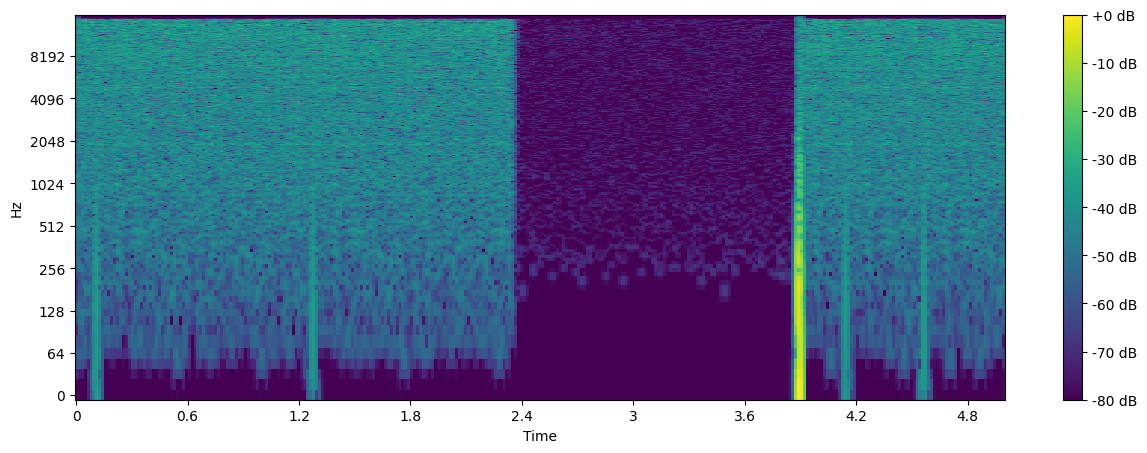

In [58]:
import numpy as np

print(chuks.shape[0])
if chuks.shape[0] > 3:

  for chunk in chuks:
    print(chunk.shape)
    D = _extract_features(chunk)
    rms_m_max = D.__abs__().max() #np.sqrt(np.mean(chunk**2) + D)
    if rms_m_max >= 70:
      print("rms_m_max: ", chunk.max())

      plt.figure(figsize=(15, 5))
      librosa.display.specshow(data=D, sr=32000, x_axis='time', y_axis='log', cmap='viridis')
      plt.colorbar(format='%+2.0f dB')
      plt.show()
      display(Audio(data=chunk, rate=32000))

else:
  for chunk in chuks:
    D = _extract_features(chunk)
    print(D.shape)
    # print("Altos: ", D[115200])
    # print("Bajos: ", D[0])
    # print(chunk.shape)
    # rms_m_max = np.sqrt(np.mean(D**2))
    rms_m_max = D.__abs__().max() #np.sqrt(np.mean(chunk**2) + D)
    # print("rms_m_max: ", rms_m_max)
    if rms_m_max >= 40:
      print("rms_m_max: ", chunk.max())
      plt.figure(figsize=(15, 5))
      librosa.display.specshow(data=D, sr=32000, x_axis='time', y_axis='log', cmap='viridis')
      plt.colorbar(format='%+2.0f dB')
      plt.show()
      display(Audio(data=chunk, rate=32000))

    '''
    flatness = np.mean(librosa.feature.spectral_flatness(y=chunk))
    print("flatness: ", flatness)
    centroid = np.mean(librosa.feature.spectral_centroid(y=chunk, sr=sr))
    print("centroid: ", centroid)
    bandwidth = np.mean(librosa.feature.spectral_bandwidth(y=chunk, sr=sr))
    print("bandwidth: ", bandwidth)
    flux = np.mean(librosa.onset.onset_strength(y=chunk, sr=sr))
    print("flux: ", flux)
    '''
